In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


# Random Forest

# Loading of datasets

In [19]:
# Load the datasets
X_train_pca = pd.read_csv('X_train_pca.csv')
X_test_pca = pd.read_csv('X_test_pca.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train_pca.head(), X_test_pca.head(), y_train.head(), y_test.head()


(      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
 0 -2.562846 -2.244455  1.553104 -0.445555  0.741239 -1.782680  0.351698   
 1 -0.768175  2.122520 -1.164018 -0.994676 -1.546225  0.634103 -1.326772   
 2 -2.598304 -1.899499 -0.985666  0.257364  0.403501  0.313866  2.521424   
 3  2.930249  0.692801 -0.944670  0.204417  0.024976 -1.516570 -0.075729   
 4 -2.153347 -1.489487  0.062592  1.040510  1.302438 -0.366933  0.815593   
 
       PCA_8  
 0 -0.284655  
 1 -0.036194  
 2 -0.632936  
 3  0.625147  
 4 -0.580401  ,
       PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
 0 -1.854276  0.191447  0.363469  0.978105  0.667735  0.590339 -1.104070   
 1 -1.204556  0.127321 -0.875062  0.554048  1.545488 -0.160066  0.370568   
 2 -0.405265  1.743791  0.219185 -1.772225  1.340282  1.280994  0.482228   
 3 -0.752700 -1.037005 -1.553654 -2.125593  0.074589 -0.433975  0.595789   
 4 -0.186841  0.349904  0.316267 -0.033593  1.573598  0.421015 -0.87223

## Building of Random Forest model

using datasets with PCA implementation

Test Set Results:
Accuracy of the Random Forest model: 98.36%

Confusion Matrix:
             Predicted: No  Predicted: Yes
Actual: No             319               6
Actual: Yes              8             521

Classification Report:
              precision    recall  f1-score   support

           0     0.9755    0.9815    0.9785       325
           1     0.9886    0.9849    0.9867       529

    accuracy                         0.9836       854
   macro avg     0.9821    0.9832    0.9826       854
weighted avg     0.9836    0.9836    0.9836       854


Training Set Results:
Accuracy of the Random Forest model: 99.88%

Confusion Matrix:
             Predicted: No  Predicted: Yes
Actual: No            1288               0
Actual: Yes              4            2123

Classification Report:
              precision    recall  f1-score   support

           0     0.9969    1.0000    0.9984      1288
           1     1.0000    0.9981    0.9991      2127

    accuracy                        

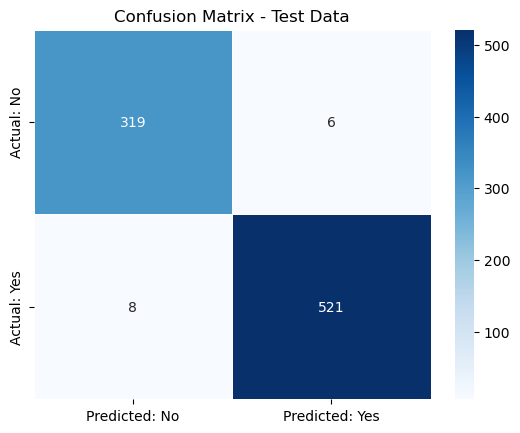

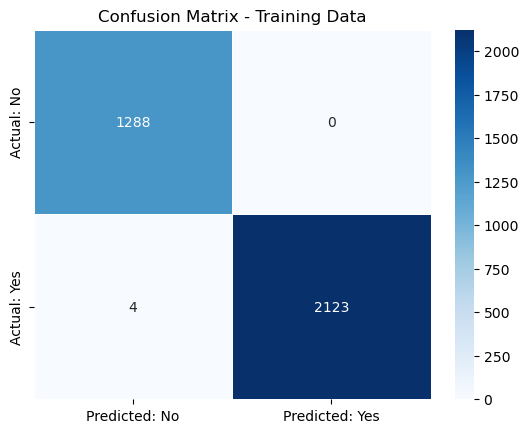

In [20]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=69)

# Train the Random Forest model on the PCA-transformed training data
random_forest_model.fit(X_train_pca, y_train.values.ravel())

# Predict on the test set
y_pred_test_rf = random_forest_model.predict(X_test_pca)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)
class_report_test_rf = classification_report(y_test, y_pred_test_rf, digits=4)

# Predict on the training set
y_pred_train_rf = random_forest_model.predict(X_train_pca)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
class_report_train_rf = classification_report(y_train, y_pred_train_rf, digits=4)

# Print Test Set Results
print("Test Set Results:")
print("Accuracy of the Random Forest model:", "{:.2%}".format(accuracy_test_rf))
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_test_rf, columns=['Predicted: No', 'Predicted: Yes'], index=['Actual: No', 'Actual: Yes']))
print("\nClassification Report:")
print(class_report_test_rf)

# Print Training Set Results
print("\nTraining Set Results:")
print("Accuracy of the Random Forest model:", "{:.2%}".format(accuracy_train_rf))
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_train_rf, columns=['Predicted: No', 'Predicted: Yes'], index=['Actual: No', 'Actual: Yes']))
print("\nClassification Report:")
print(class_report_train_rf)

# Visualization for Test Confusion Matrix
sns.heatmap(conf_matrix_test_rf, annot=True, fmt="d", linewidths=.5, cmap='Blues', 
            xticklabels=['Predicted: No', 'Predicted: Yes'], 
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix - Test Data')
plt.show()

# Visualization for Training Confusion Matrix
sns.heatmap(conf_matrix_train_rf, annot=True, fmt="d", linewidths=.5, cmap='Blues', 
            xticklabels=['Predicted: No', 'Predicted: Yes'], 
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix - Training Data')
plt.show()


### Test Set Results
- **Accuracy**: 98.36%
- **Confusion Matrix**:
  - **Predicted: No** (319 correct, 6 incorrect)
  - **Predicted: Yes** (8 incorrect, 521 correct)
- **Classification Report**:
  - Precision for class 0 (No): 97.55%
  - Recall for class 0 (No): 98.15%
  - F1-score for class 0 (No): 97.85%
  - Precision for class 1 (Yes): 98.86%
  - Recall for class 1 (Yes): 98.49%
  - F1-score for class 1 (Yes): 98.67%
  - Overall accuracy: 98.36%

### Training Set Results
- **Accuracy**: 99.88%
- **Confusion Matrix**:
  - **Predicted: No** (1288 correct, 0 incorrect)
  - **Predicted: Yes** (4 incorrect, 2123 correct)
- **Classification Report**:
  - Precision for class 0 (No): 99.69%
  - Recall for class 0 (No): 100.00%
  - F1-score for class 0 (No): 99.84%
  - Precision for class 1 (Yes): 100.00%
  - Recall for class 1 (Yes): 99.81%
  - F1-score for class 1 (Yes): 99.91%
  - Overall accuracy: 99.88%

### Analysis
- **High Performance**: Both the training and test set results show very high performance metrics, indicating that the Random Forest model is effectively capturing the patterns in the data.
- **Generalization**: The model demonstrates good generalization from the training set to the test set, as indicated by the consistent high performance across both datasets.
- **Precision and Recall**: The model exhibits high precision and recall, suggesting it is capable of correctly identifying most positive and negative classes with few errors.
- **Potential Overfitting**: The slightly higher metrics on the training set compared to the test set may suggest mild overfitting, although the test accuracy remains very high.

The visualizations of the confusion matrices provide a clear representation of the model's performance, showing a high number of correct predictions with very few false positives and false negatives. This confirms the model's strong ability to classify the data accurately, making it a robust choice for this task.

Given these results, the decision to use Random Forest appears justified as it offers excellent performance and robustness, making it suitable for environments where accuracy is critical, and the complexity of Random Forest is manageable.


# K-folds validation technique

In [21]:
# Load data
X_train_pca = pd.read_csv('X_train_pca.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  # Compatibility

# Setup the pipeline with RandomForest
model = Pipeline([
    ('scaler', StandardScaler()), 
    ('random_forest', RandomForestClassifier(random_state=69))
])

# Define the k-fold cross-validation method
kf = KFold(n_splits=10, shuffle=True, random_state=41)

# Perform cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=kf, scoring='accuracy')  # Change scoring to 'roc_auc', 'f1', etc., if needed

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)
print("\n")
# Print the average accuracy score
print("Average cross-validation score:", scores.mean())


Accuracy scores for each fold:
 [0.96783626 0.98538012 0.97076023 0.99122807 0.98245614 0.98240469
 0.98533724 0.98533724 0.97653959 0.95894428]


Average cross-validation score: 0.9786223868566823


### Accuracy Scores for Each Fold
The accuracy scores for each of the 10 folds range from about 95.89% to 99.12%. This indicates a relatively consistent performance across different subsets of the data, which is a good sign of the model's stability and generalizability. The slight variation in accuracy can be expected in real-world scenarios and is generally acceptable unless the variability is much larger.

### Overall Evaluation
- **High Performance**: All the scores are quite high, which suggests that the model is performing very well across the board. This high level of accuracy indicates effective learning and prediction capabilities for the dataset you are using.
- **Consistency**: The scores are consistent, with the majority being above 97%, and the lowest at approximately 95.89%. This consistency further supports the robustness of your model.


### Evaluation 
Random Forest model exhibits excellent performance with robust accuracy across multiple cross-validation folds. This suggests that the model is well-suited for the data and should perform reliably on similar unseen data.
